In [241]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.

def mean(array):
    mean_mi = 0
    for i in range(len(array)):
        mean_mi += array[i]
    mean_mi = mean_mi/len(array)
    return mean_mi

def incert_A(array):
    return ufloat(array.mean(), array.std(ddof=1)/np.sqrt(len(array)))

def  incert_B(array, precision):
    array_er = []
    for i in range(len(array)):
        array_er.append(ufloat(array[i], precision/np.sqrt(3)))
    return array_er

def T(E):
    return 1.5 + 23.3*E

def qa(Tb, T1, x1, x0):
    k=10
    A=0
    return k*A*((Tb-T1)/(x1-x0))


In [242]:
df = pd.read_excel("Dados_experimento.xlsx", index_col=0)
df

,T,Barra1,Barra2,Barra3,Barra4
0,T1,68.083633,76.005633,79.803533,76.852200
1,T2,59.944167,66.204100,73.667867,54.445367
2,T3,52.760000,57.963667,66.336133,42.539067
3,T4,45.257400,48.729100,57.218067,32.426867
4,T5,39.859567,41.242033,50.367867,27.696967
5,T6,35.098600,34.081167,41.987633,24.745633
6,T7,32.613267,29.312433,35.789833,23.844700
7,T8,1.500000,27.308633,32.931700,23.627233
8,T9,1.500000,25.366190,29.879400,23.448600
9,T10,1.500000,24.334000,27.999867,23.370933


In [243]:
k1, k2, k3, k4 = 237, 237, 237, 15.1
A1, A2, A3, A4 = 0.019793, 0.019793, 0.050669,  0.050669

x1 = np.array([0, 35, 85, 135, 210, 285, 385, 489])/1000
x = np.array([0, 35, 85, 135, 210, 285, 410, 545, 695, 845, 989])/1000

t1, t2, t3, t4 = df['Barra1'].values, df['Barra2'].values, df['Barra3'].values, df['Barra4'].values
q1, q2, q3, q4 = [],[],[],[]

for i in range(len(t1)-1):
    if i > 5:
        q1.append(-50)
    else:
        q1.append(-k1*A1*((t1[i+1]-t1[i])/(x1[i+1]-x1[i])))

for i in range(len(t1)-1):
    q2.append(-k2*A2*((t2[i+1]-t2[i])/(x[i+1]-x[i])))
    q3.append(-k3*A3*((t3[i+1]-t3[i])/(x[i+1]-x[i])))
    q4.append(-k4*A4*((t4[i+1]-t4[i])/(x[i+1]-x[i])))

d = pd.DataFrame({'q1':q1, 'q2':q2, 'q3':q3, 'q4':q4})
d

,q1,q2,q3,q4
0,1090.907369,1313.668988,2105.156524,489.814593
1,674.010039,773.107732,1760.870166,182.190655
2,703.885079,866.376148,2189.895736,154.737269
3,337.612236,468.285173,1096.813197,48.251406
4,297.778850,447.882707,1341.793015,30.107610
5,116.585520,178.958774,595.412878,5.514446
6,-50.000000,69.627464,254.237375,1.232475
7,-50.000000,60.745914,244.358042,0.911151
8,-50.000000,32.279616,150.469838,0.396153


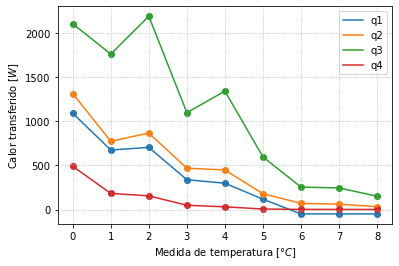

In [244]:
fig, ax = plt.subplots()
ax.set( xlabel=r'Medida de temperatura $[°C]$', 
        ylabel=r'Calor transferido $[W]$')
        
ax.plot(d.index, q1, label='q1')
ax.plot(d.index, d['q2'].values, label='q2')
ax.plot(d.index, d['q3'].values, label='q3')
ax.plot(d.index, d['q4'].values, label='q4')

ax.scatter(d.index, q1)
ax.scatter(d.index, d['q2'].values)
ax.scatter(d.index, d['q3'].values)
ax.scatter(d.index, d['q4'].values)

ax.grid(ls='dotted')
ax.legend()